
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [2]:
# Ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Загрузка данных

In [3]:
# Ваш код здесь
data = pd.read_csv("sales.csv")

In [8]:
target_columns = ['SalePrice']

### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

In [6]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [22]:
data.shape

(1460, 12)

In [9]:
data.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


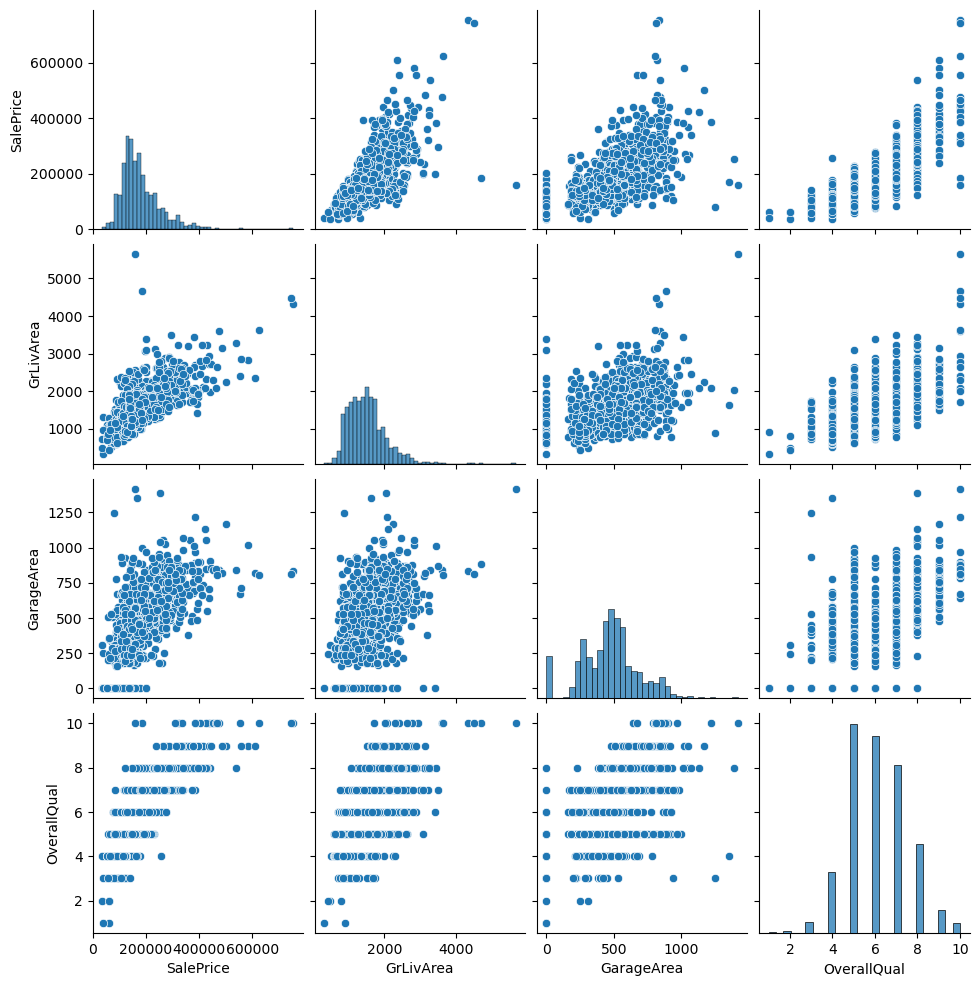

In [20]:
sns.pairplot(data.select_dtypes(include=['int64']))

In [16]:
cat_col = data.select_dtypes(include=['O']).columns
for col in cat_col:
    print(f"{col} - {data[col].nunique()}")

Street - 2
SaleCondition - 6


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder(sparse_output=False)
ohe_columns = data.select_dtypes(include=['O']).columns
ohe.fit(data[ohe_columns])
data[ohe.get_feature_names_out()] = ohe.transform(data[ohe_columns])
data.drop(ohe_columns, axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SalePrice              1460 non-null   int64  
 1   GrLivArea              1460 non-null   int64  
 2   GarageArea             1460 non-null   int64  
 3   OverallQual            1460 non-null   int64  
 4   Street_Grvl            1460 non-null   float64
 5   Street_Pave            1460 non-null   float64
 6   SaleCondition_Abnorml  1460 non-null   float64
 7   SaleCondition_AdjLand  1460 non-null   float64
 8   SaleCondition_Alloca   1460 non-null   float64
 9   SaleCondition_Family   1460 non-null   float64
 10  SaleCondition_Normal   1460 non-null   float64
 11  SaleCondition_Partial  1460 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 137.0 KB


Между целевой переменной и между количественными признаками виднеется линейная зависимость

### 4. Разделение на обучающую и тестовую выборки

In [21]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop(target_columns, axis=1).copy()
y = data[target_columns].copy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [24]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
pd.DataFrame({'features': X_train.columns,"coef": lin_reg.coef_[0]}).sort_values(by='coef', ascending=False)

,features,coef
2,OverallQual,26827.461342
7,SaleCondition_Alloca,23486.531964
10,SaleCondition_Partial,19990.972713
3,Street_Grvl,7579.988108
1,GarageArea,68.178842
0,GrLivArea,44.953917
6,SaleCondition_AdjLand,-2928.843933
9,SaleCondition_Normal,-4632.443066
4,Street_Pave,-7579.988108
5,SaleCondition_Abnorml,-11768.381215


### 6. Получение предсказаний для обучающей и тестовой выборок

In [36]:
# Ваш код здесь
pred_reg = lin_reg.predict(X_test)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [38]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print(f"MAE = {mean_absolute_error(y_test, pred_reg)}")
print(f"MSE = {mean_squared_error(y_test, pred_reg)}")


MAE = 26678.51567444205
MSE = 1579708286.2840698


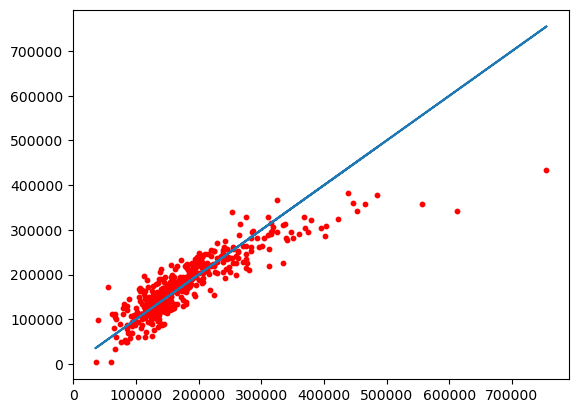

In [54]:
plt.scatter(y_test, pred_reg, s=10, c='r')
plt.plot(y_test, y_test);